<a href="https://colab.research.google.com/github/dasd412/my-first-ai/blob/main/NNM_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()
train_scaled=train_input/255.0
train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
def model_fn(a_layer=None):
    model=keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100,activation='relu'))

    if a_layer:
        model.add(a_layer)

    model.add(keras.layers.Dense(10,activation='softmax'))
    return model

In [3]:
model=model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=5,verbose=0)

In [5]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


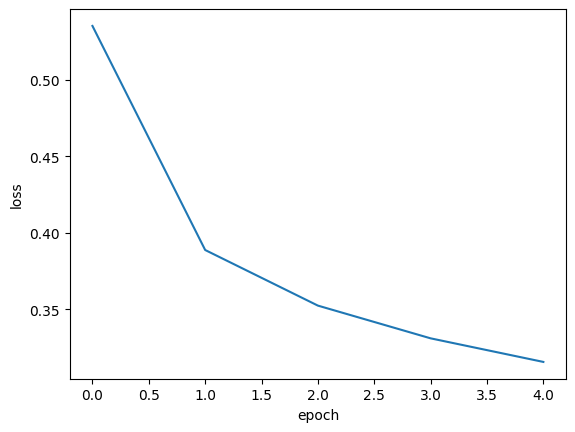

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

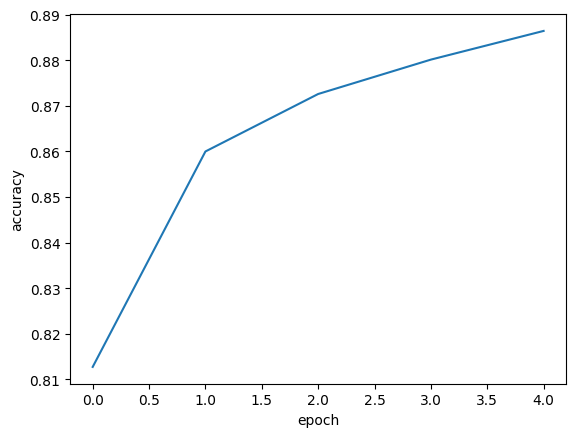

In [7]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

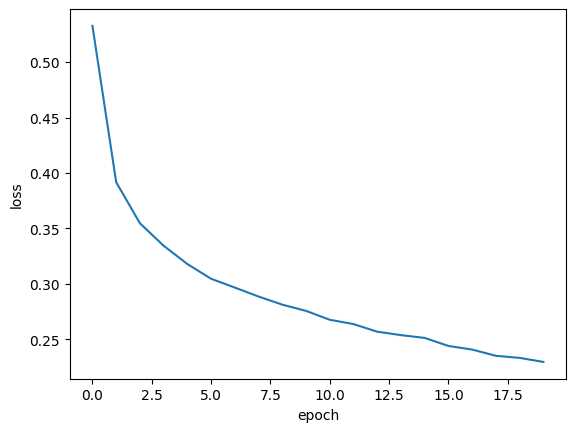

In [8]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20,verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

에포크에 따른 과대적합과 과소적합을 파악하려면 훈련 세트뿐만 아니라 검증 세트에 대한 점수도 필요하다. 그래서 검증 세트의 손실도 그려야 한다.

In [9]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))

In [10]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


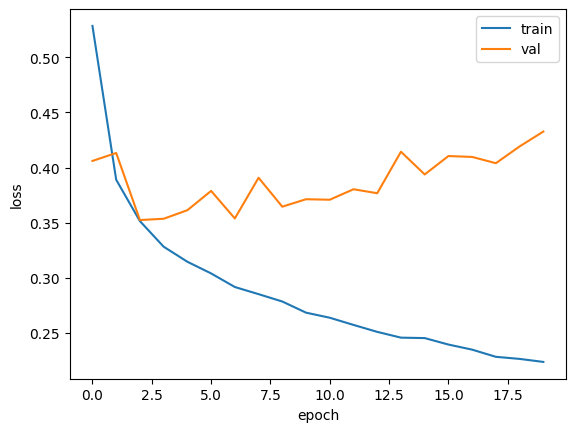

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

검증 손실이 상승하는 시점을 가능한 뒤로 늦추면, 검증 세트에 대한 손실이 줄어들뿐만 아니라 검증 세트에 대한 정확도도 증가한다.

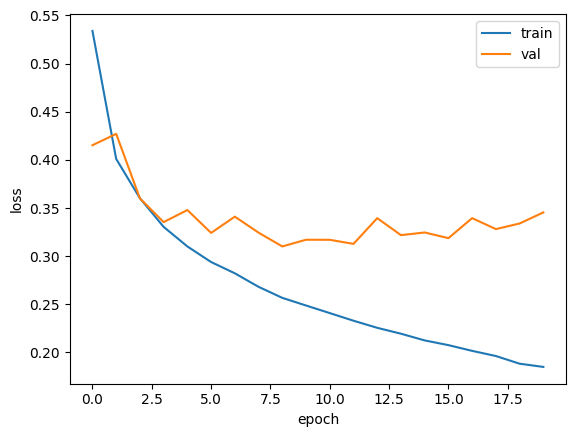

In [12]:
# adam optimizer를 적용해보기

model=model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

드롭아웃 : 훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막는 기법

In [13]:
model=model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


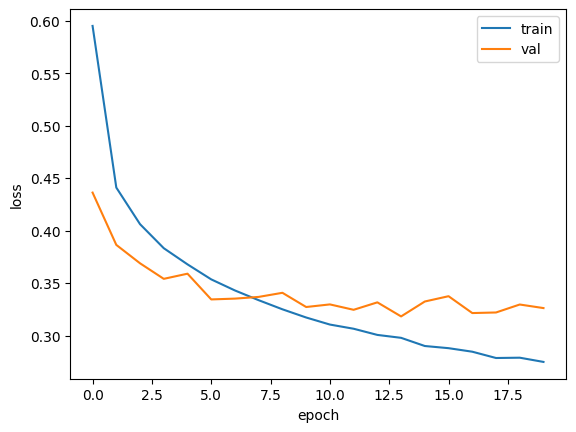

In [14]:
# 훈련이 끝난 뒤에 평가나 예측을 수행할 떄는 드롭아웃을 적용하지 말아야 한다.
# 텐서플로와 케라스는 평가와 예측 시에는 자동으로 드롭아웃을 적용하지 않는다.

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [15]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=10,verbose=0,validation_data=(val_scaled,val_target))

In [16]:
model.save_weights('model-weights.h5') # 훈련된 모델의 파라미터를 하둡 포맷으로 저장

In [17]:
model.save('model-whole.h5') # 모델 구조와 모델 파라미터 함께 저장

In [18]:
!ls -al *.h5

-rw-r--r-- 1 root root 333320 Aug 30 23:06 model-weights.h5
-rw-r--r-- 1 root root 981176 Aug 30 23:06 model-whole.h5


In [19]:
model=model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [21]:
import numpy as np
val_labels=np.argmax(model.predict(val_scaled),axis=-1)
print(np.mean(val_labels==val_target))

375/375 [==============================] - 1s 4ms/step
0.8850833333333333


In [22]:
model=keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.3282 - accuracy: 0.8851


[0.3282029330730438, 0.8850833177566528]

콜백은 훈련 과정 중간에 어떤 작업을 수행해줄 수 있게 하는 객체다.

In [23]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)

history=model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb])

In [24]:
model=keras.models.load_model('best-model.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3168 - accuracy: 0.8866


[0.31676185131073, 0.8865833282470703]

검증 점수가 상승하기 시작하는 에포크 이후에는 과대적합이 더 커지므로 훈련을 계속할 필요가 없다.
이를 막기 위해 '조기 종료'라는 규제를 사용한다.

In [25]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)

early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

history=model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

In [26]:
print(early_stopping_cb.stopped_epoch)

8


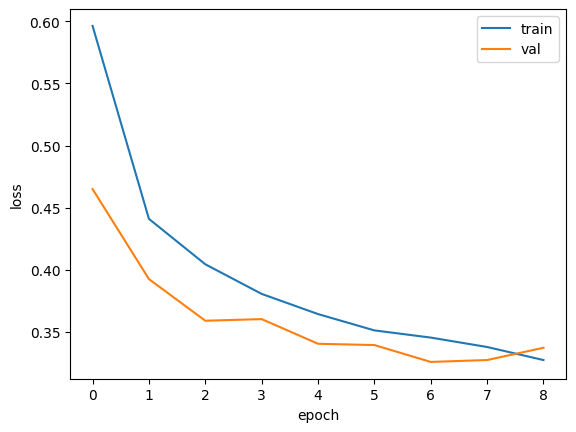

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [28]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3258 - accuracy: 0.8811


[0.3257756233215332, 0.8810833096504211]